In [52]:
import pylab as plt
import os
from scipy import *
from scipy.optimize import leastsq
import numpy as np
import matplotlib
from mpl_toolkits.basemap import Basemap
import UVspec3
import glob
from matplotlib.legend import Legend 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [53]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

# Configuration

In [54]:

png=True # True or False
Normalize=False #False or True
sza=60
#fntype = '{:4.1f}'.format(sza)+'_'+'clearsky_reflectivity'
fntype = '{:4.1f}'.format(sza)+'_'+'aerosol_default_reflectivity'

if Normalize:
    pngfile = '../figs/fig_'+fntype.replace('.','_')+'_Normalized.png'
else:
    pngfile = '../figs/fig_'+fntype.replace('.','_')+'.png'
    
ensure_dir('../figs')

# Get filelist

In [55]:
fntype = '*'+fntype+'*'
inpfiles = sort(glob.glob('input/'+fntype))
outfiles = sort(glob.glob('output/'+fntype+'uu*'))

print(inpfiles)
print(outfiles)

xsize = 20
ysize = 9

linestyle = ('b', 'b:','g', 'g:','r', 'r:')

['input/uvspec_350.0_60.0_aerosol_default_reflectivity.inp'
 'input/uvspec_450.0_60.0_aerosol_default_reflectivity.inp'
 'input/uvspec_620.0_60.0_aerosol_default_reflectivity.inp'
 'input/uvspec_750.0_60.0_aerosol_default_reflectivity.inp'
 'input/uvspec_880.0_60.0_aerosol_default_reflectivity.inp'
 'input/uvspec_980.0_60.0_aerosol_default_reflectivity.inp']
['output/uvspec_350.0_60.0_aerosol_default_reflectivity.out_uu'
 'output/uvspec_450.0_60.0_aerosol_default_reflectivity.out_uu'
 'output/uvspec_620.0_60.0_aerosol_default_reflectivity.out_uu'
 'output/uvspec_750.0_60.0_aerosol_default_reflectivity.out_uu'
 'output/uvspec_880.0_60.0_aerosol_default_reflectivity.out_uu'
 'output/uvspec_980.0_60.0_aerosol_default_reflectivity.out_uu']


# Plot

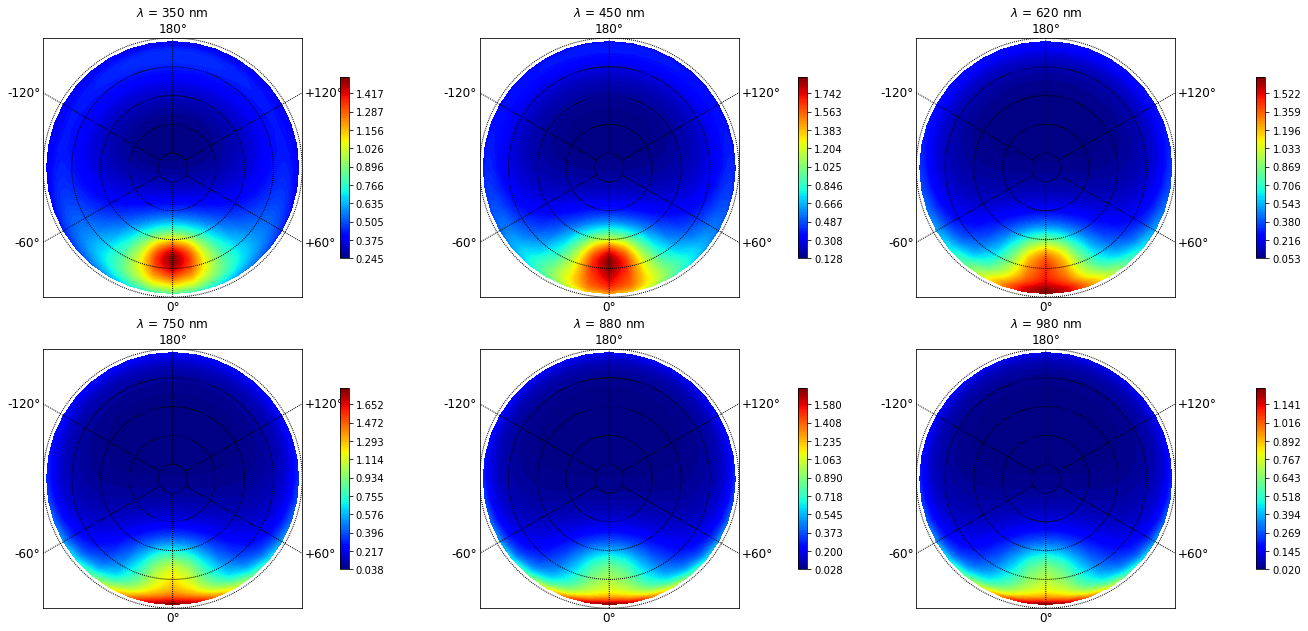

In [56]:
fig = plt.figure(figsize=(xsize,ysize))
fig.subplots_adjust(left=0.03, right=0.9, bottom=0.04, top=0.92,wspace=0.15)
#ax = plt.subplot(111)
m = Basemap(boundinglat=0.,lon_0=0.,resolution=None,projection='npaeqd')

fontsize = 'large'

wavelengths = np.array([350, 450, 620, 750, 880, 980])
levels = np.array([ 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3])

plot  = [231,232,233,234,235,236]
i = 0
for inpfile,outfile in zip(inpfiles,outfiles):

    phi = UVspec3.get_vals(inpfile,'phi')
    phis = [float(x) for x in phi]
    umu = UVspec3   .get_vals(inpfile,'umu')
    umus = [float(x) for x in umu]
    umu = np.arccos(np.array((umus)))*180/np.pi-90
    lat,lon = plt.meshgrid(phis, umu)
    X,Y = m(lat,lon)

    data = np.genfromtxt(outfile)
    ax = plt.subplot(plot[i])

    if Normalize:
        data=data/data.max()
        levels = np.linspace(0, 1, 21)
    else:
        mind = data.min()
        maxd = data.max()
        levels = np.linspace(mind, maxd, 100)
    CS = m.contourf(X,Y,data,levels,cmap="jet")
    m.drawparallels(plt.arange(0,90,20),labels=[1,1,1,1], fontsize=fontsize)
    m.drawmeridians(plt.arange(0,360,60),labels=[1,1,1,1],labelstyle='+/-', fontsize=fontsize)

    plt.title(r"$\lambda$ = " + str(wavelengths[i])+' nm',
              fontsize = fontsize, position=(0.5,1.06))
    if True: #( i == 2 ):
        CB = plt.colorbar(CS, shrink=0.7)
        l,b,w,h = plt.gca().get_position().bounds
        ll,bb,ww,hh = CB.ax.get_position().bounds
        CB.ax.set_position([ll+0.05*ll, b+0.*h, ww, h*1.])

    i = i + 1

if png:
    fig.savefig(pngfile, bbox_inches='tight')
else:
    plt.show()


In [57]:
! ls ../figs

fig_30_0_aerosol_default_reflectivity.png
fig_30_0_aerosol_default_reflectivity_Normalized.png
fig_30_0_clearsky_reflectivity.png
fig_30_0_clearsky_reflectivity_Normalized.png
fig_60_0_aerosol_default_reflectivity.png
fig_60_0_aerosol_default_reflectivity_Normalized.png
fig_60_0_clearsky_reflectivity.png
fig_60_0_clearsky_reflectivity_Normalized.png
